<h1>Introduction To Capstone Project</h1>
<br>
You have recently been hired as a Data Analyst by a global IT and business consulting services firm that is known for their expertise in IT solutions and their team of highly experienced IT consultants.  In order to keep pace with changing technologies and remain competitive, your organization regularly analyzes data to help identify future skill requirements. 
<br><br>
As a Data Analyst, you will be assisting with this initiative and have been tasked with collecting data from various sources and identifying trends for this year's report on emerging skills. 
<br><br>
Your first task is to collect the top programming skills that are most in demand from various sources including:
<br>
Job postings
<br>
Training portals
<br>
Surveys
<br><br>
Once you have collected enough data, you will begin analyzing the data and identify insights and trends that may include the following:
<br>
What are the top programming languages in demand?
<br>
What are the top database skills in demand?
<br>
What are the popular IDEs?
<br><br>
You will begin by scraping internet web sites and accessing APIs to collect data in various formats like .csv files, excel sheets, and databases.   
 <br>
 

Once this is completed, you will make that data ready for analysis using data wrangling techniques. 

## 1) Lab: Collect Jobs Data using GitHub Jobs API

In [131]:
#Import required libraries
import requests
baseurl = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/datasets/githubposting.json"

### Function to get the number of jobs for the given technology.

In [132]:
def get_number_of_jobs(technology):
    request = requests.get(baseurl)
    data = request.json()




    #prendo la posizione delle "technology"
    a = data.get("technology")

    key_list = list(a.keys())
    val_list = list(a.values())


    

    #uso la posizione trovata per vedere il valore corrispondente nei "number of job posting"
    b = data["number of job posting"]

    key_list1 = list(b.keys())
    val_list1 = list(b.values())




    #trovo ogni key dove il valore è "Python" nel dizionario
    lenguage_index = []
    for iteration, pos in enumerate(val_list):
        if pos == technology:
            lenguage_index.append(key_list[iteration])

    #trovo il valore dei job post
    jobs = []
    for num in lenguage_index:
        num = int(num)
        jobs.append(val_list1[num])


    number_of_jobs = sum(map(int, jobs))   


    return technology,number_of_jobs

In [133]:
print(get_number_of_jobs('Python'))

('Python', 51)


### Store the results in an excel file


In [134]:
from openpyxl import Workbook #import librrary to create excell file

technologies_list = ["C",
                    "C#",
                    "C++",
                    "Java",
                    "JavaScript",
                    "Python",
                    "Scala",
                    "Oracle",
                    "SQL Server",
                    "MySQL Server",
                    "PostgreSQL",
                    "MongoDB"]


wb=Workbook()                     
ws=wb.active


#appending the n° of jobs posting for every technology in the excell file
ws.append(['Technology Name','Number of Jobs Posting'])
for tech_name in technologies_list:
    ws.append([get_number_of_jobs(tech_name)[0], get_number_of_jobs(tech_name)[1]])


wb.save("github-job-postings.xlsx")

## 2) Collecting Lenguages Popularity Data With Web Scraping

In [135]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"


#download the webpage
data = requests.get(url).text

#create a soup object
soup = BeautifulSoup(data, "html.parser")


#scraping the webpage to find the Tables containing the Lenguage name and the Annual salary
table = soup.find("table")
lenguage = []
avg_salary = []

for row in table.find_all("tr"):
    col = row.find_all("td")
    lenguage.append(col[1].getText())
    avg_salary.append(col[3].getText())


#saving the scraped data into a .csv file
scraped = [lenguage, avg_salary]
scrapedT = list(map(list, zip(*scraped))) #transpose the list

df = pd.DataFrame(scrapedT, columns = ["Lenguage", "Annual_Avg_Salary"])
df.to_csv("popular-languages.csv")



## 3) Survey Dataset Exploration Lab

In [136]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
df = pd.read_csv(dataset_url)


### Exploring the dataset

In [137]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [138]:
#number of rows and columns
print(df.shape[0],
      df.shape[1])

11552 85


In [139]:
#data type of every clumn
a = df.dtypes
print(a)

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object


In [140]:
#mean of Age column
df["Age"].mean()

30.77239449133718

In [141]:
#countries in the survey
print(df["Country"].unique())

['United States' 'New Zealand' 'United Kingdom' 'Australia' 'Brazil'
 'Lithuania' 'Israel' 'South Africa' 'Czech Republic' 'Spain' 'Germany'
 'Serbia' 'India' 'Sweden' 'China' 'France' 'Netherlands' 'Philippines'
 'Ireland' 'Pakistan' 'Austria' 'Canada' 'Croatia' 'Italy'
 'Russian Federation' 'Argentina' 'Romania' 'Iran' 'Hungary' 'Latvia'
 'Hong Kong (S.A.R.)' 'United Arab Emirates' 'Poland' 'Portugal'
 'Bulgaria' 'Nicaragua' 'Denmark' 'Japan' 'Guatemala' 'Bangladesh'
 'Ukraine' 'Mexico' 'Egypt' 'Switzerland' 'Mauritius' 'South Korea'
 'Slovenia' 'Estonia' 'Norway' 'Singapore' 'Republic of Moldova' 'Belgium'
 'Nigeria' 'Turkey' 'Thailand' 'Mongolia' 'Chile' 'Malaysia' 'Georgia'
 'Luxembourg' 'Dominican Republic' 'Cape Verde' 'Burundi' 'Finland'
 'Greece' 'Colombia' 'Taiwan' 'Yemen' 'Indonesia' 'Belarus' 'Slovakia'
 'Nepal' 'Kenya' 'Venezuela, Bolivarian Republic of...' 'Armenia' 'Panama'
 'Lebanon' 'Kuwait' 'Algeria' "Côte d'Ivoire" 'Bosnia and Herzegovina'
 'Brunei Darussalam' 'Costa

## 4) Data Wrangling

### Cleaning duplicates

In [142]:
df = pd.read_csv(dataset_url)
df["is_duplicate"] = pd.DataFrame(df.duplicated())

In [143]:
#finding the number of duplicates and removing them
df["is_duplicate"] = pd.DataFrame(df.duplicated())
print(sum(df["is_duplicate"]))

df = df.drop_duplicates()

df = df.loc[:, df.columns != 'is_duplicate']


61


### Cleaning missing values

In [144]:
#finding missing data
missing_data = df.isnull()
sum(missing_data["WorkLoc"])


#find the most ommon value
df["WorkLoc"].value_counts()

Office                                            6846
Home                                              3608
Other place, such as a coworking space or cafe     973
Name: WorkLoc, dtype: int64

In [145]:
import numpy as np
#replace the missing values with the most common value
df["WorkLoc"].replace(np.NaN, "Office", inplace= True)


#verify if it was succesfull
df["WorkLoc"].value_counts()

Office                                            6878
Home                                              3608
Other place, such as a coworking space or cafe     973
Name: WorkLoc, dtype: int64

### Normalizing data

In [146]:
#listing the values of the column that need to be normalized
df["CompFreq"].value_counts()


#creating a new column containing the normalized values
a = df[["CompFreq", "CompTotal"]]
index1 = range(0, (len(df)))  #index skipping in position 1168; had to reset it
df.index = index1
df["NormalizedAnnualCompensation"] = ""

for iteration, row in enumerate(a["CompFreq"]):
    if row == "Yearly":
        df["NormalizedAnnualCompensation"][iteration] = df["CompTotal"][iteration]
    
    elif row == "Monthly":
        df["NormalizedAnnualCompensation"][iteration] = df["CompTotal"][iteration]*12
    
    else:
        df["NormalizedAnnualCompensation"][iteration] = df["CompTotal"][iteration]*52



#checking the median
df["NormalizedAnnualCompensation"].median()

C:\Users\mkanc\AppData\Local\Temp/ipykernel_4796/2089788196.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mkanc\AppData\Local\Temp/ipykernel_4796/2089788196.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mkanc\AppData\Local\Temp/ipykernel_4796/2089788196.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



100000.0

## 5) Exploratory Data Analysis Lab

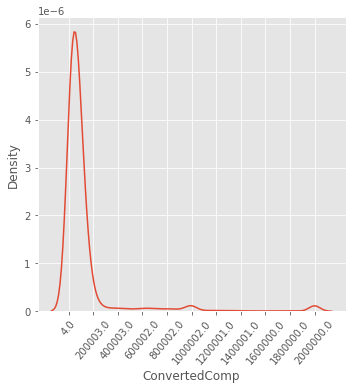

In [147]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


#salary data distribution
a = pd.DataFrame(df['ConvertedComp'])
a = a.loc[(a!=0).any(axis=1)]
a = a.dropna()
a = a.astype(int)
count, bin_edges = np.histogram(a['ConvertedComp'])
bin_edges = bin_edges.astype(int)



g = sns.displot(a, x="ConvertedComp", kind="kde")

# iterate over axes of FacetGrid
for ax in g.axes.flat:
    labels = bin_edges # get x labels
    ax.set_xticks(labels) # set new labels
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%0.1f')) 
    ax.tick_params(axis="x", rotation=50)

57744.0


Man                                                            10537
Woman                                                            734
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

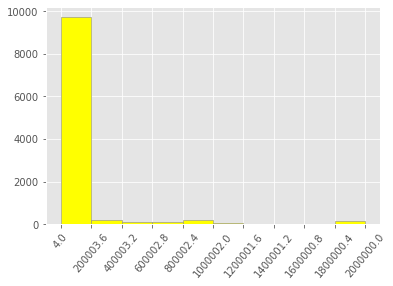

In [148]:
from matplotlib.ticker import FormatStrFormatter
a = pd.DataFrame(df['ConvertedComp'])
a = a.loc[(a!=0).any(axis=1)] #tolgo gli 0
a = a.dropna() #tolgo i NaN
a = a.astype(int) # trasformo in int


fig, ax = plt.subplots()
counts, bins, patches = ax.hist(a, facecolor='yellow', edgecolor='gray')
ax.set_xticks(bins)
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax.tick_params(axis="x", rotation=50)


#median of the salaries
print(df["ConvertedComp"].median())

#salary gender composition
df["Gender"].value_counts()



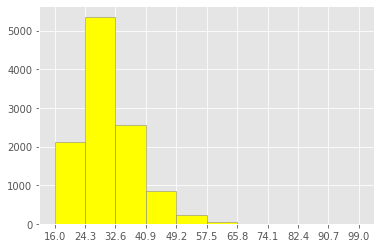

In [149]:

#summary of the column Age
df.loc[1:5]["Age"].describe()

#histogram of the column Age
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(df['Age'], facecolor='yellow', edgecolor='gray')
ax.set_xticks(bins)

### Outliers

<AxesSubplot:>

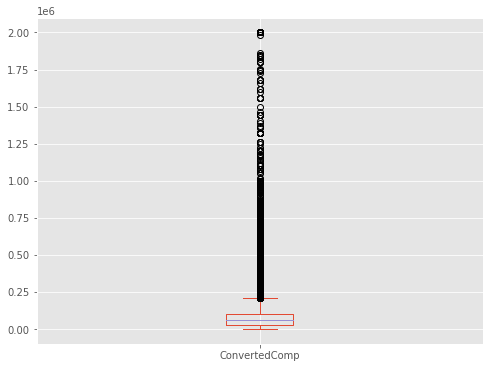

In [150]:
#creating a boxplot of the "salary" column
df["ConvertedComp"].plot(kind='box', figsize=(8, 6))

In [151]:
#calulating the quartiles
q3, q1 = np.percentile(a, [75 ,25])
iqr = q3 - q1
iqr

72746.5

In [152]:
#finding out how many outliers there are in the salary column
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
 

a[a['ConvertedComp'] > upper_bound].count()

ConvertedComp    885
dtype: int64

In [153]:
#creating a clean database
data_clean = a[~((a < lower_bound) | (a > upper_bound)).any(axis=1)]
data_clean.head()

,ConvertedComp
0,61000
1,95179
2,90000
4,65277
5,31140


### Correlation

In [154]:
r = df.corr()
r["Age"]

Respondent       0.004444
CompTotal        0.006990
ConvertedComp    0.104478
WorkWeekHrs      0.036726
CodeRevHrs      -0.019606
Age              1.000000
Name: Age, dtype: float64

## 6) Data Visualization Lab

In [155]:
import sqlite3
#connecting to the database
conn = sqlite3.connect("4.1 - m4_survey_data.sqlite") 


QUERY = """SELECT *
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

Text(0, 0.5, 'WorkWeekHrs')

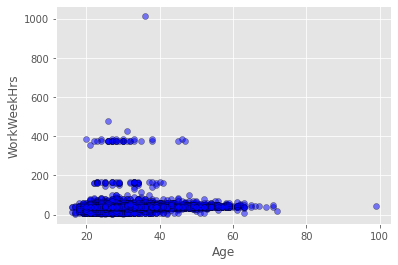

In [156]:
#reletionship between Age and WorkWeekHours columns
plt.scatter(x = df["Age"], y = df["WorkWeekHrs"], edgecolors="black", alpha = 0.5, c = "b")
plt.xlabel("Age")
plt.ylabel("WorkWeekHrs")

In [157]:

import plotly.express as px

#correlation between `WorkWeekHrs` and `CodeRevHrs`, with `Age` column as bubble size.
df1 = df[["WorkWeekHrs", "CodeRevHrs", "Age"]]
df1 = df1.dropna()

fig = px.scatter(df1, x="WorkWeekHrs", y="CodeRevHrs",
	             size="Age", color="Age",
                 hover_name="Age", log_x=True, size_max=100 )
fig.show()

<AxesSubplot:ylabel='DatabaseDesireNextYear'>

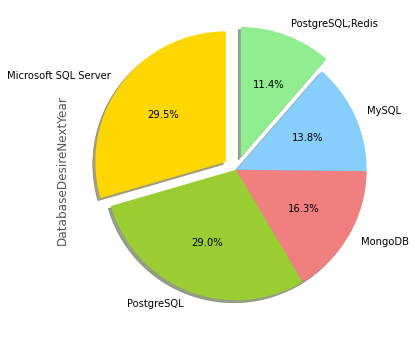

In [158]:
df1 = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

#visualizing data composition
df_pie = df1[["DatabaseDesireNextYear"]]
df_pie = df_pie.dropna()
df_tot = pd.DataFrame(df_pie["DatabaseDesireNextYear"].value_counts().reset_index().head(5))

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.1, 0, 0, 0, 0.1] # ratio for each continent with which to offset each wedge.

df_tot.plot(kind='pie', x = "index", y = "DatabaseDesireNextYear",
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=df_tot["index"].head(),
                            legend = None,         
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

(-1.1122186912758876,
 1.1022067141379202,
 -1.1094287844950461,
 1.1004490014677948)

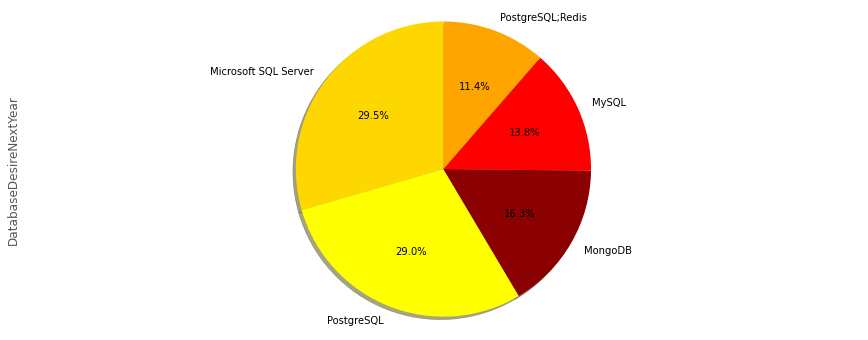

In [159]:
mpl.style.use('ggplot')
a = pd.DataFrame(df_pie["DatabaseDesireNextYear"].value_counts().reset_index().head())
a = a.rename(columns={a.columns[0]: 'Database'})

colors_list = ['gold', 'yellow', 'darkred', 'red', 'orange']

a["DatabaseDesireNextYear"].plot(kind='pie',
        figsize=(15, 6),
        autopct='%1.1f%%', 
        startangle=90,    
        shadow=True,       
        labels=a["Database"],         # turn off labels on pie chart
        colors=colors_list)  # add custom colors

plt.axis('equal')


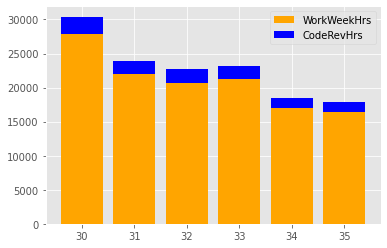

In [160]:
#stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.

df2 = df[["WorkWeekHrs", "CodeRevHrs", "Age"]]
df2 = df2[df2['Age'] >= 30]
df2 = df2[df2['Age'] <= 35]
df2 = pd.DataFrame(df2.groupby("Age").sum().reset_index())


plt.bar(df2["Age"], df2["WorkWeekHrs"], color='orange')
plt.bar(df2["Age"], df2["CodeRevHrs"], bottom=df2["WorkWeekHrs"], color='blue')
plt.legend(["WorkWeekHrs", "CodeRevHrs"],loc=1)
plt.show()

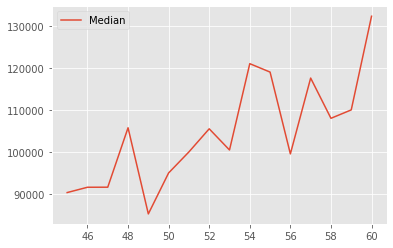

In [161]:
#median `ConvertedComp` for all ages from 45 to 60.

df3 = df[["ConvertedComp", "Age"]]
df3 = df3[df3['Age'] >= 45]
df3 = df3[df3['Age'] <= 60]
df3 = pd.DataFrame(df3.groupby("Age").median().reset_index())

plt.plot(df3["Age"], df3["ConvertedComp"])
plt.legend(["Median"], loc = 2)

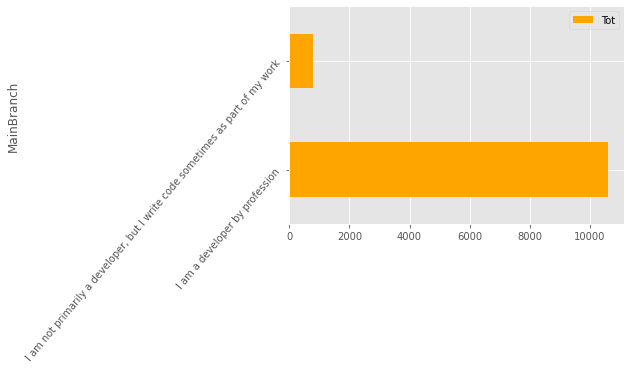

In [162]:
#horizontal bar chart using column `MainBranch.`
df4 = df[["MainBranch"]]
df4_percent = pd.DataFrame(df4.value_counts().reset_index())
df4_percent.rename(columns = {df4_percent.columns[1]: "Tot"}, inplace = True)


df4_percent.plot.barh(x='MainBranch', y="Tot", color='orange')
plt.tick_params(axis= ("y"), rotation = 50)

In [163]:
#closing the connection to the database
conn.close()